# Title of the project: Analysis of current ride sharing companies

## Introduction of the project : 
Our task is to find patterns in the available information of different ride sharing companies in Chicago and we want to understand the passenger preferences and the impact of external factors on rides. Also we test a hypothesis about the impact of weather on ride frequency.
For this project, we divide into four steps:
- Data intialization and loading
- Data preprocessing
- Exploratory data analysis
- Testing the hypothesis

### First stage: Data initialization and loading 
In this stage we load all the libraries needed for this project and also load various informations and understand the contents of the dataframe.

In [24]:
# Import all libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as st
from scipy.stats import ttest_ind

In [25]:
# Load the dataframe
df=pd.read_csv('/datasets/project_sql_result_01.csv')
display(df)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
...,...,...
59,4053 - 40193 Adwar H. Nikola,7
60,2733 - 74600 Benny Jona,7
61,5874 - 73628 Sergey Cab Corp.,5
62,2241 - 44667 - Felman Corp,3


The df dataframe consists of 64 rows and 2 columns. The columns denotes:
- company_name : taxi company name
- trips_amount : the number of rides for each taxi company on November 15-16, 2017.

In [26]:
# Load the dataframe
dropoff_data=pd.read_csv('/datasets/project_sql_result_04.csv')
display(dropoff_data)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
...,...,...
89,Mount Greenwood,3.137931
90,Hegewisch,3.117647
91,Burnside,2.333333
92,East Side,1.961538


The dropoff_data dataframe consists of 94 rows and 2 columns. The columns denotes:
- dropoff_location_name : Chicago neighborhoods where rides ended
- average_trips : the average number of rides that ended in each neighborhood in November 2017.

In [27]:
# Load the dataframe
ride_data=pd.read_csv('/datasets/project_sql_result_07.csv')
display(ride_data)

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0
1066,2017-11-11 08:00:00,Good,1380.0


The ride_data dataframe consists of 1068 rows and 3 columns. The columns denotes:
- start_ts : pickup date and time
- weather_conditions :weather conditions at the moment the ride started
- duration_seconds: ride duration in seconds

In this stage we import the libraries needed and load all the dataframes.

### Second stage: Data preprocessing
In this stage, we preprocess the data and deal with the missing values. Then,check whether there are any duplicates in the data.

In [28]:
# Checking df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


The df consists of 64 non_null rows and data type is appropriate.

In [29]:
#Recheck for missing values
df.isnull().sum()

company_name    0
trips_amount    0
dtype: int64

The above result shows there is no missing values in the dataframe.

In [30]:
#Checking duplicates
df.duplicated().sum()

0

The above result shows no duplicated rows in the dataframe.

In [31]:
#Checking dropoff data
dropoff_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


The dropoff data consists of 94 non null rows the average number of rides is float64 datatype. The number of rides will be an integer number. Therfore convert average number of rides to int datatype.

In [32]:
# Convert the datatype
dropoff_data['average_trips'] = dropoff_data['average_trips'].astype(int)

In [33]:
#Recheck for missing values
dropoff_data.isnull().sum()

dropoff_location_name    0
average_trips            0
dtype: int64

The above result shows there is no missing values in the dataframe.

In [34]:
#Checking duplicates
dropoff_data.duplicated().sum()

0

The above result shows no duplicated rows in the dataframe.

In [35]:
#Checking ride data
ride_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


The ride data consists of 1068 non null rows and datatypes are for start_ts(pick up date and time) is object type. We should convert it to daetime type.

In [36]:
#Convert the datatype
ride_data['start_ts']=pd.to_datetime(ride_data['start_ts'])

In [37]:
#Recheck for missing values
ride_data.isnull().sum()

start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64

The above result shows there is no missing values in the dataframe.

In [38]:
#Checking duplicates
ride_data.duplicated().sum()

197

The above result shows 197 rows are duplicated in the above dataframe. The values having same pickup points maybe different customers or maybe an error due to dataentry, humanerrors etc. For our further analysis we drop this duplicates. 

In [39]:
# Remove duplicates
ride_data=ride_data.drop_duplicates()

In this stage, we preprocess the data for analysis. We change the datatypes to appropriate form, check whether any duplicated values, any missing values etc. 

### Third Stage: Exploratory data analysis
In this stage, we analyze the data and find the pattern of users. We want to find the top 10 companies having highest average number of rides and plot the data. Also find the top 10 neighbourhood locations.

In [40]:
#identify the top 10 neighborhoods in terms of drop-offs
top_10_neighborhoods=dropoff_data.sort_values(by='average_trips',ascending=False).head(10)
print(top_10_neighborhoods)

  dropoff_location_name  average_trips
0                  Loop          10727
1           River North           9523
2         Streeterville           6664
3             West Loop           5163
4                O'Hare           2546
5             Lake View           2420
6            Grant Park           2068
7         Museum Campus           1510
8            Gold Coast           1364
9    Sheffield & DePaul           1259


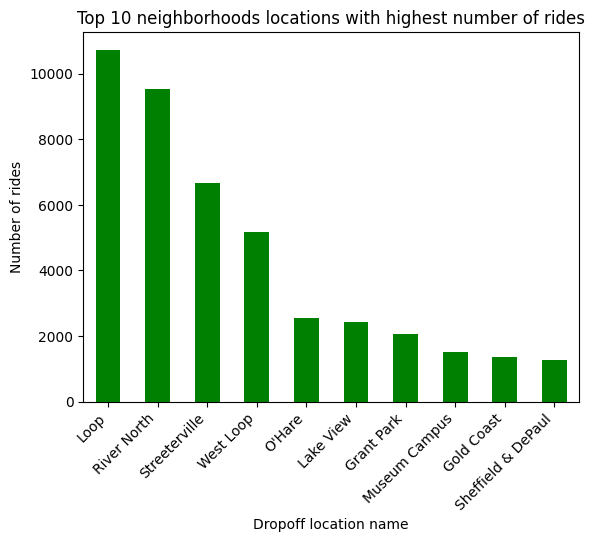

In [41]:
#Plot the data
top_10_neighborhoods.set_index('dropoff_location_name').plot(kind='bar',color='green', title='Top 10 neighborhoods locations with highest number of rides',legend=False)
plt.xlabel('Dropoff location name')
plt.ylabel('Number of rides')
plt.xticks(rotation=45, ha='right')
plt.show()

The above result and plot shows the top ten neighbourhood locations interms of dropoff. The highest dropoff locations are Loop,  River North etc which shows the nearby area of downtown. People prefer dropoff in downtowns may be because of parking difficulties or may be due to traffic.

In [42]:
#Top 10 companies
top_10_companies=df.sort_values(by='trips_amount',ascending=False).head(10)
print(top_10_companies)

                        company_name  trips_amount
0                          Flash Cab         19558
1          Taxi Affiliation Services         11422
2                  Medallion Leasing         10367
3                         Yellow Cab          9888
4    Taxi Affiliation Service Yellow          9299
5          Chicago Carriage Cab Corp          9181
6                       City Service          8448
7                           Sun Taxi          7701
8          Star North Management LLC          7455
9  Blue Ribbon Taxi Association Inc.          5953


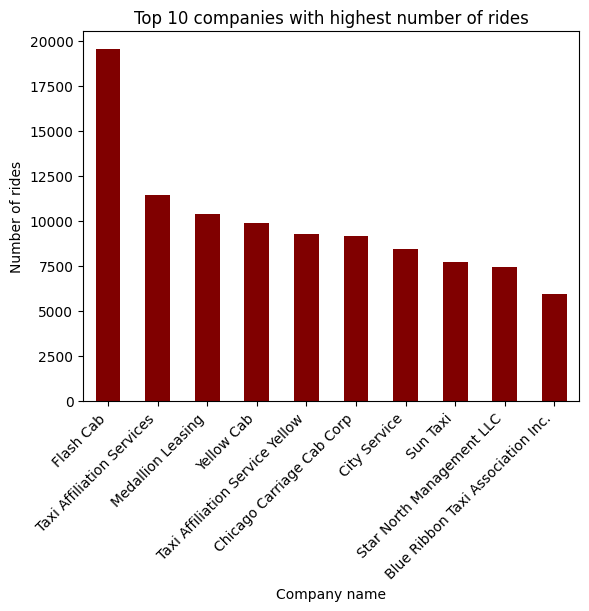

In [43]:
#Plot the data
top_10_companies.set_index('company_name').plot(kind='bar',color='maroon',title='Top 10 companies with highest number of rides',legend=False)
plt.xlabel('Company name')
plt.ylabel('Number of rides')
plt.xticks(rotation=45, ha='right')
plt.show()

The above result shows the top companies which offers highest number of rides.The reasons for customer's preference may be because of availability, better prices and offers, customer support etc.

In this stage we analyze the preprocessed data and find the top companies and top 10 dropoff locations to find the competitors and pattern of the rides.

### Fourth Stage:Testing the hypothesis 
In this stage we test the hypothesis

In [44]:
# Average duration of rides on rainy Saturdays
rainy_days =ride_data[(ride_data['start_ts'].dt.weekday==5)& (ride_data['weather_conditions']=='Bad')]
rainy_duration=rainy_days['duration_seconds']

In [45]:
# Average duration of rides on nonrainy Saturdays
nonrainy_days =ride_data[(ride_data['start_ts'].dt.weekday==5)& (ride_data['weather_conditions']!='Bad')]
nonrainy_duration=nonrainy_days['duration_seconds']

Use t test to check the hypothesis.

In [46]:
# Check the hypothesis.
alpha=0.05
results=st.ttest_ind(rainy_duration, nonrainy_duration, equal_var=False)
print('p-value:', results.pvalue)
if results.pvalue < alpha:
    print('We reject the null hypothesis')
else:
    print('We cant reject the null hypothesis')

p-value: 9.126383933880083e-08
We reject the null hypothesis


The above result shows the rejection of null hypothesis. i.e, The average duration of rides  changes on rainy Saturdays.

In [ ]:
## Conclusion:
 In this project our aim is to find patterns in the available information of different ride sharing companies in Chicago and we want to understand the passenger preferences and the impact of external factors on rides. The project consists of different parts like:
 - Data intialization and loading
 - Data preprocessing
 - Exploratory data analysis
 - Testing the hypothesis
 
 In the first stage, we import all the important libraries and intialize the data. In the second stage we preprocess the data like convert the datatypes to appropriate form, check for missing and duplicated values etc. After this stage our data is clean and we can use it for further analysis.
 
 In the third stage we analyze the data and plot different patterns. The top companies with highest number of rides are Flash Cab, Tax Affliation Services etc and the reasons for customer's preference may be because of availability, better prices and offers, customer support etc. The highest dropoff locations are Loop,  River North etc which shows the nearby area of downtown. People prefer dropoff in downtowns may be because of parking difficulties or may be due to traffic.
 
 
  In the fourth stage we test the hypothesis.  The null and alternative hypothesis are
- H0 = The average duration of rides doesn't change on rainy Saturdays.
- H1 = The average duration of rides changes on rainy Saturdays.

After performing t test we reject the null hypthesis.  